### Module 2: spacetime

### Importation des librairies.

In [236]:
import numpy
import sympy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [237]:
from sympy import init_printing
init_printing()

In [238]:
from sympy.utilities.lambdify import lambdify


### Partie A :

### Déclaration: des constantes, des conditions initiales, des conditions aux bords.

In [239]:
##Constantes
nx = 51
dx = 11/(nx-1)    
dt = .001
nt=51
L =11
vmax=80
rhomax=250

##Conditions initiales
x = numpy.linspace(0,L,nx)
rho0 = numpy.ones(nx)*10
rho0[10:20] = 50

##condition au bord
rho0[0]=10



### Vérification des données initiales.

In [240]:
print(x)
print(rho0)

[  0.     0.22   0.44   0.66   0.88   1.1    1.32   1.54   1.76   1.98
   2.2    2.42   2.64   2.86   3.08   3.3    3.52   3.74   3.96   4.18
   4.4    4.62   4.84   5.06   5.28   5.5    5.72   5.94   6.16   6.38
   6.6    6.82   7.04   7.26   7.48   7.7    7.92   8.14   8.36   8.58
   8.8    9.02   9.24   9.46   9.68   9.9   10.12  10.34  10.56  10.78  11.  ]
[ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  50.  50.  50.  50.  50.
  50.  50.  50.  50.  50.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.
  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.
  10.  10.  10.  10.  10.  10.]


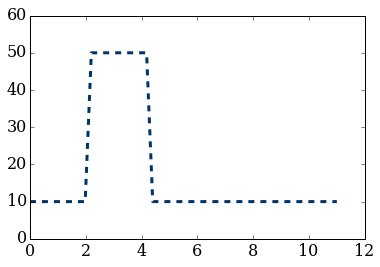

In [241]:
pyplot.plot(x, rho0, color='#003366', ls='--', lw=3)
pyplot.ylim(0,60);

### Définition des variables symboliques.

In [242]:
rho= sympy.symbols('rho')


## Définir la vitesse

In [243]:
v=vmax*(1-rho/rhomax)*1000/3600
print(v)

-4*rho/45 + 200/9


### Partie 1-1

In [244]:
print("Vitesse minimum en t=0 min :",min(v_lamb(rho0[0:])))

Vitesse minimum en t=0 min : 17.7777777778


### Partie 1-2

### équation  aux dérivées partielles pour la densité.

In [245]:
for n in range(1,nt):  
    un = rho0.copy() 
    rho0[1:] = un[1:]+2*vmax*dt/rhomax*dx*un[1:]*(un[1:]-un[0:-1])-vmax*dt/dx*(un[1:]-un[0:-1])
    if n==50:
        print(rho0[0:])

[ 10.          10.          10.          10.          10.          10.          10.
  10.          10.          10.          10.00000001  10.00000021
  10.00000298  10.00002825  10.00019704  10.00108026  10.0048485
  10.01832573  10.05955456  10.16908856  10.42481504  10.95438834
  11.93433196  13.56406876  16.0110214   19.33918479  23.4499331
  28.06707772  32.78056227  37.13258594  40.70768258  43.19155228
  44.38887459  44.21672568  42.69784238  39.96457136  36.26420899
  31.94657419  27.42164589  23.09251832  19.28438661  16.19437094
  13.87813236  12.27323109  11.2450958   10.63612469  10.30266928
  10.13391072  10.05500622  10.02094357  10.00737842]


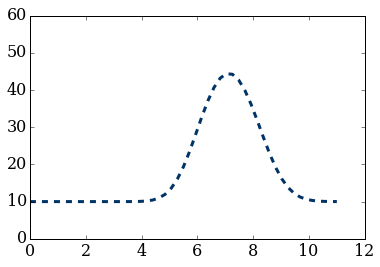

In [246]:
pyplot.plot(x, rho0, color='#003366', ls='--', lw=3)
pyplot.ylim(0,60);

In [247]:
v=vmax*(1-rho/rhomax)*1000/3600
print(v)

-4*rho/45 + 200/9


In [248]:
v_lamb = lambdify((rho), v)
print(format(v_lamb(rho0[0:])))

[ 21.33333333  21.33333333  21.33333333  21.33333333  21.33333333
  21.33333333  21.33333333  21.33333333  21.33333333  21.33333333
  21.33333333  21.33333331  21.33333307  21.33333082  21.33331582
  21.33323731  21.33290236  21.33170438  21.32803959  21.31830324
  21.295572    21.24849881  21.16139271  21.01652722  20.79902032
  20.50318357  20.13778372  19.72737087  19.30839446  18.92154792
  18.60376155  18.38297313  18.27654448  18.29184661  18.42685845
  18.66981588  18.99873698  19.38252674  19.78474259  20.16955393
  20.50805452  20.78272258  20.98861046  21.13126835  21.22265815
  21.27678892  21.3064294   21.32143016  21.32844389  21.33147168
  21.33267747]


### Définition de la vitesse moyenne

In [249]:
s=sum(v_lamb(rho0[0:]))  ## somme des éléments du tableau
v_average=s/nt          

In [250]:
print("Vitesse moyenne en t= 3 min :",v_average)

Vitesse moyenne en t= 3 min : 20.6329681196


### Partie 1-3

In [251]:
##constantes
nx = 51
dx = 11/(nx-1)    
dt = .001
nt1=101
L =11
vmax=80
rhomax=250

##conditions initiales
x = numpy.linspace(0,L,nx)
rho01= numpy.ones(nx)*10
rho01[10:20] = 50

##condition au bord
rho01[0]=10



In [252]:
for n in range(1,nt1):  
    un1 = rho01.copy() 
    rho01[1:] = un1[1:]+2*vmax*dt/rhomax*dx*un1[1:]*(un1[1:]-un1[0:-1])-vmax*dt/dx*(un1[1:]-un1[0:-1])
    if n==100:
        print(rho01[0:])

[ 10.          10.          10.          10.          10.          10.          10.
  10.          10.          10.          10.          10.          10.          10.
  10.          10.          10.          10.          10.          10.00000002
  10.00000009  10.00000043  10.00000186  10.00000737  10.00002683
  10.00009026  10.00028188  10.00082035  10.00223261  10.00569983
  10.01368916  10.03100839  10.06640464  10.13473643  10.25955001
  10.47558507  10.8303741   11.38380574  12.20446685  13.36193052
  14.91500424  16.89720437  19.30207019  22.07187983  25.09336735
  28.20288625  31.20130451  33.87642115  36.02876277  37.49592928
  38.17133548]


In [253]:
v=vmax*(1-rho/rhomax)*1000/3600
print(v)

-4*rho/45 + 200/9


In [254]:
v_lamb1= lambdify((rho), v)
print(format(v_lamb1(rho01[0:])))

[ 21.33333333  21.33333333  21.33333333  21.33333333  21.33333333
  21.33333333  21.33333333  21.33333333  21.33333333  21.33333333
  21.33333333  21.33333333  21.33333333  21.33333333  21.33333333
  21.33333333  21.33333333  21.33333333  21.33333333  21.33333333
  21.33333333  21.3333333   21.33333317  21.33333268  21.33333095
  21.33332531  21.33330828  21.33326041  21.33313488  21.33282668
  21.33211652  21.33057703  21.3274307   21.32135676  21.31026222
  21.2910591   21.2595223   21.21032838  21.13738072  21.03449507
  20.89644407  20.7202485   20.50648265  20.26027735  19.99170068
  19.715299    19.44877293  19.21098479  19.01966553  18.88925073
  18.82921462]


In [255]:
print("Vitesse minimum en t= 6 min :",min(v_lamb1(rho01[0:])))

Vitesse minimum en t= 6 min : 18.8292146242


### Partie B :

### Partie 2-1:

In [256]:
##constantes
nx = 51
dx = 11/(nx-1)    
dt = .001
nt=51
L =11
vmax1=136
rhomax=250

##conditions initiales
x = numpy.linspace(0,L,nx)
rho1= numpy.ones(nx)*20
rho1[10:20] = 50

##condition au bord
rho1[0]=20



In [257]:
print(x)
print(rho1)

[  0.     0.22   0.44   0.66   0.88   1.1    1.32   1.54   1.76   1.98
   2.2    2.42   2.64   2.86   3.08   3.3    3.52   3.74   3.96   4.18
   4.4    4.62   4.84   5.06   5.28   5.5    5.72   5.94   6.16   6.38
   6.6    6.82   7.04   7.26   7.48   7.7    7.92   8.14   8.36   8.58
   8.8    9.02   9.24   9.46   9.68   9.9   10.12  10.34  10.56  10.78  11.  ]
[ 20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  50.  50.  50.  50.  50.
  50.  50.  50.  50.  50.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.
  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.
  20.  20.  20.  20.  20.  20.]


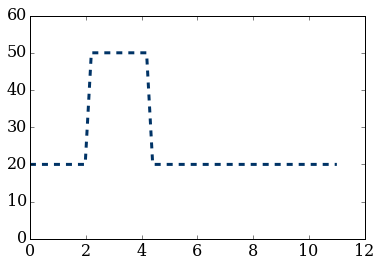

In [258]:
pyplot.plot(x, rho1, color='#003366', ls='--', lw=3)
pyplot.ylim(0,60);

In [259]:
v1=vmax1*(1-rho/rhomax)*1000/3600
print(v1)

-34*rho/225 + 340/9


In [260]:
v1_lamb2 = lambdify((rho), v1)
print(format(v1_lamb2(rho1[0:])))

[ 34.75555556  34.75555556  34.75555556  34.75555556  34.75555556
  34.75555556  34.75555556  34.75555556  34.75555556  34.75555556
  30.22222222  30.22222222  30.22222222  30.22222222  30.22222222
  30.22222222  30.22222222  30.22222222  30.22222222  30.22222222
  34.75555556  34.75555556  34.75555556  34.75555556  34.75555556
  34.75555556  34.75555556  34.75555556  34.75555556  34.75555556
  34.75555556  34.75555556  34.75555556  34.75555556  34.75555556
  34.75555556  34.75555556  34.75555556  34.75555556  34.75555556
  34.75555556  34.75555556  34.75555556  34.75555556  34.75555556
  34.75555556  34.75555556  34.75555556  34.75555556  34.75555556
  34.75555556]


In [261]:
print("Vitesse minimum en t=0 min :",min(v1_lamb2(rho1[0:])))

Vitesse minimum en t=0 min : 30.2222222222


In [262]:
for n in range(1,nt):  
    un = rho1.copy() 
    rho1[1:] = un[1:]+2*vmax1*dt/rhomax*dx*un[1:]*(un[1:]-un[0:-1])-vmax1*dt/dx*(un[1:]-un[0:-1])
    if n==50:
        print(rho1[0:])

[ 20.          20.          20.          20.          20.          20.          20.
  20.          20.          20.          20.          20.          20.          20.
  20.          20.          20.          20.          20.          20.00000001
  20.00000009  20.00000052  20.00000274  20.00001306  20.00005636
  20.00022146  20.00079528  20.002619    20.00793327  20.02216262
  20.05723561  20.1369328   20.30407174  20.62781138  21.20715541
  22.16486801  23.62638338  25.68282026  28.34597482  31.51243998
  34.95669937  38.36354752  41.39115138  43.73960676  45.19848224
  45.66175253  45.11797594  43.63349328  41.34181279  38.43942092
  35.17785966]


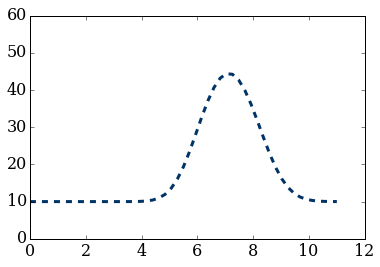

In [263]:
pyplot.plot(x, rho0, color='#003366', ls='--', lw=3)
pyplot.ylim(0,60);

In [264]:
v2=vmax1*(1-rho/rhomax)*1000/3600  ### la coefficient (1000/3600) est pour changer 
print(v2)

-34*rho/225 + 340/9


In [265]:
v2_lamb = lambdify((rho), v2)
print(format(v2_lamb(rho1[0:])))

[ 34.75555556  34.75555556  34.75555556  34.75555556  34.75555556
  34.75555556  34.75555556  34.75555556  34.75555556  34.75555556
  34.75555556  34.75555556  34.75555556  34.75555556  34.75555556
  34.75555556  34.75555556  34.75555556  34.75555556  34.75555555
  34.75555554  34.75555548  34.75555514  34.75555358  34.75554704
  34.75552209  34.75543538  34.7551598   34.75435675  34.75220654
  34.74690662  34.73486349  34.70960694  34.66068628  34.57314096
  34.42841995  34.20756873  33.89681827  33.49438603  33.01589796
  32.4954321   31.98061949  31.5231149   31.1682372   30.94778491
  30.87777962  30.9599503   31.18427213  31.53057051  31.96915417
  32.46201232]


In [266]:
s1=sum(v2_lamb(rho1[0:]))  ## somme des elements de tableau
v2_average=s1/nt            ## somme des elements de tableau divisés par nombre d'elements 

### partie 2-2

In [267]:
print("Vitesse moyenne en t=3 min :",v2_average)

Vitesse moyenne en t=3 min : 33.9652702217


### partie 2-3

In [226]:
print("Vitesse minimum en t=3 min :",min(v2_lamb(rho1[0:])))

Vitesse minimum en t=3 min : 30.877779618
